Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [2]:
#loading the dataset to pandas dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
#getting info from the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features::
1. Sex
2. Smoker
3. Region

In [6]:
#checking for missing values in the dataset
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis 
Statistical measures of the dataset

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age distribution')

<Figure size 600x600 with 0 Axes>

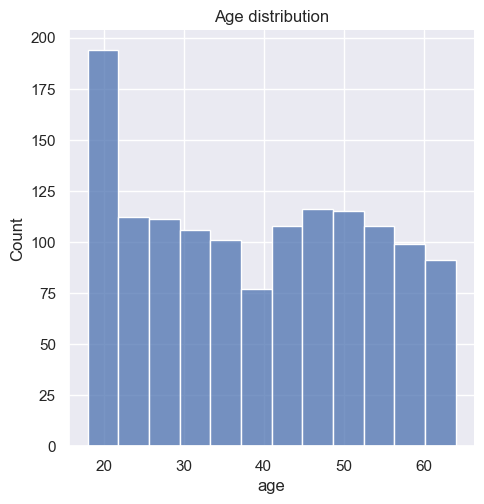

In [9]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age distribution')


Text(0.5, 1.0, 'Sex distribution')

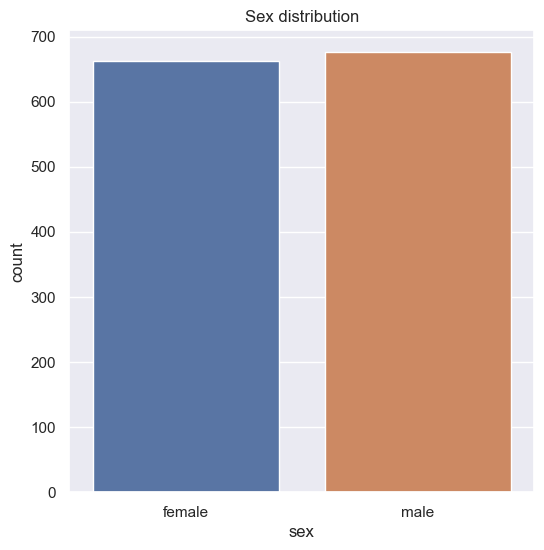

In [11]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex distribution')

Text(0.5, 1.0, 'Distribution of BMI')

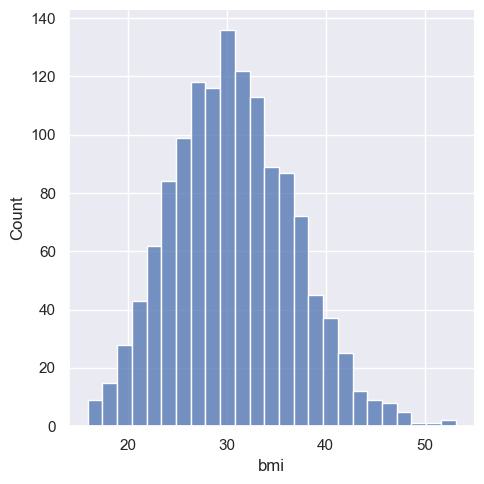

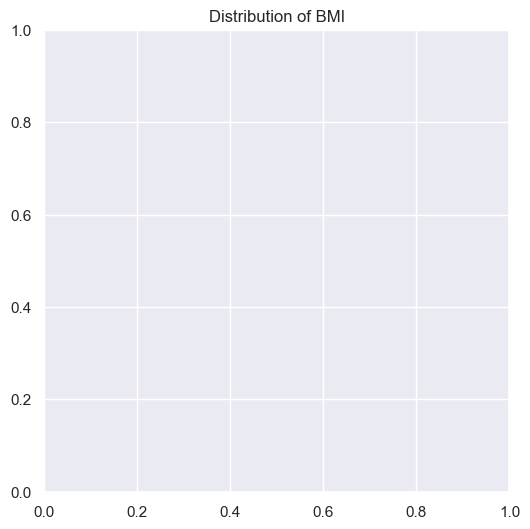

In [13]:
#bmi distribution
sns.displot(insurance_dataset['bmi'])
plt.figure(figsize=(6, 6))
plt.title('Distribution of BMI')

Text(0.5, 1.0, 'Number of children')

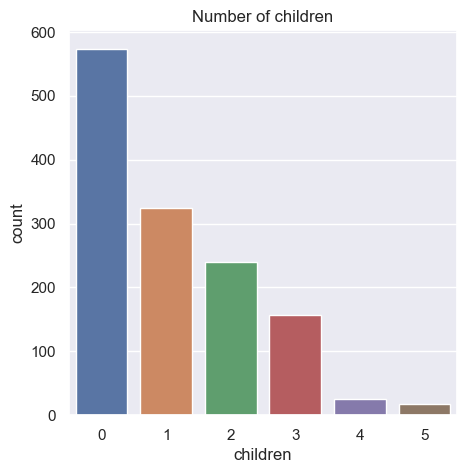

In [14]:
#children column
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Number of children')

Text(0.5, 1.0, 'Smoker count')

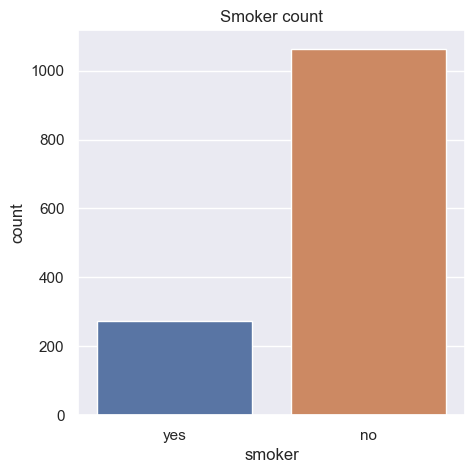

In [15]:
#smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker count')

Text(0.5, 1.0, 'Region')

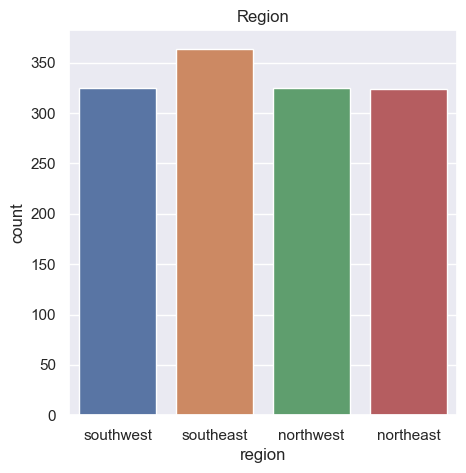

In [16]:
#regions column
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')

Text(0.5, 1.0, 'Distribution of charges')

<Figure size 500x500 with 0 Axes>

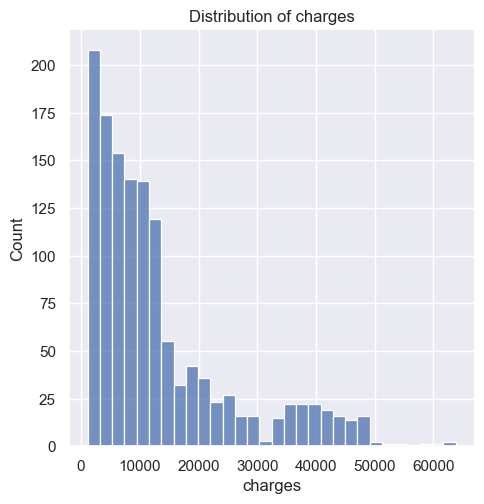

In [17]:
#distribution of charges value
plt.figure(figsize=(5,5))
sns.displot(insurance_dataset['charges'])
plt.title('Distribution of charges')

Data Pre-Processing

Encoding the categorical features

In [18]:
#encoding the sex column
insurance_dataset.replace({'sex':{'male': 0, 'female': 1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes': 0, 'no': 1}}, inplace=True)
insurance_dataset.replace({'region':{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)


Splitting the features and target

In [20]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into train and test data

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

Linear Regression Model

In [25]:
#loading the linear regression model
insurance_regressor = LinearRegression()

insurance_regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [28]:
#prediction on training data
training_data_prediction = insurance_regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction) 

print('R squared value of training data : ', r2_train)


#prediction on test data
test_data_prediction = insurance_regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

print('R squared value of test data : ', r2_test)

R squared value of training data :  0.7519923667088932
R squared value of test data :  0.7445422986536504


Buliding a predictive system

In [29]:
input_data = (19,1,27.9,0,0,0)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = insurance_regressor.predict(input_data_reshaped)

print("The insurance cost is USD", prediction[0])

The insurance cost is USD 25191.827456822364


/Users/caephas/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
